In [1]:
import torch
import json
import joblib
import os

In [11]:
data_dir = '/Users/vinay/Projects/Crossmdl/Data/'


annotns_file = '/Users/vinay/Projects/Crossmdl/Data/youcookii_annotations_trainval.json'

store_loc = os.path.join(data_dir,'emb.joblib')

store_loc2 = os.path.join(data_dir,'emb_alltokens.joblib')
store_loc

'/Users/vinay/Projects/Crossmdl/Data/emb.joblib'

In [12]:
with open(annotns_file) as json_file:
    annotns = json.load(json_file)
    vidnames = annotns['database'].keys()
    storage = {}
    for vid in vidnames:
        lis_sent = []
        segments = annotns['database'][vid]['annotations']
        for seg in segments:
            lis_sent.append(seg['sentence'])
        storage[vid] = lis_sent
        #import pdb;pdb.set_trace()

In [13]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch

In [5]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

In [6]:
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
from tqdm import tqdm

In [15]:
def feature_extraction(storage,model,tokenizer,get_alltokens=False):
    out = {}
    for vid in tqdm(storage):
        lis_feat = []
        for sent in storage[vid]:
            with torch.no_grad():
                inputs = tokenizer(sent, return_tensors="pt")
                outputs = model(**inputs)
            if get_alltokens:
                lis_feat.append(outputs.last_hidden_state[0,1:,:].cpu().detach().numpy())
            else: 
                lis_feat.append(outputs.last_hidden_state[0,0,:].cpu().detach().numpy())
        out[vid] = lis_feat
    return out
            

In [16]:
out2 = feature_extraction(storage,model,tokenizer,get_alltokens=True)

100%|███████████████████████████████████████| 1790/1790 [03:06<00:00,  9.58it/s]


In [ ]:
#out = feature_extraction(storage,model,tokenizer)

In [17]:
joblib.dump(out2,store_loc2)

['/Users/vinay/Projects/Crossmdl/Data/emb_alltokens.joblib']

In [11]:
joblib.dump(out,store_loc)

['/Users/vinay/Projects/Crossmdl/Data/emb.joblib']

In [28]:
base = []
for key in out:
    base.extend(out[key])


In [34]:
X = np.array(base)

/Users/vinay/mambaforge/envs/mlops/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


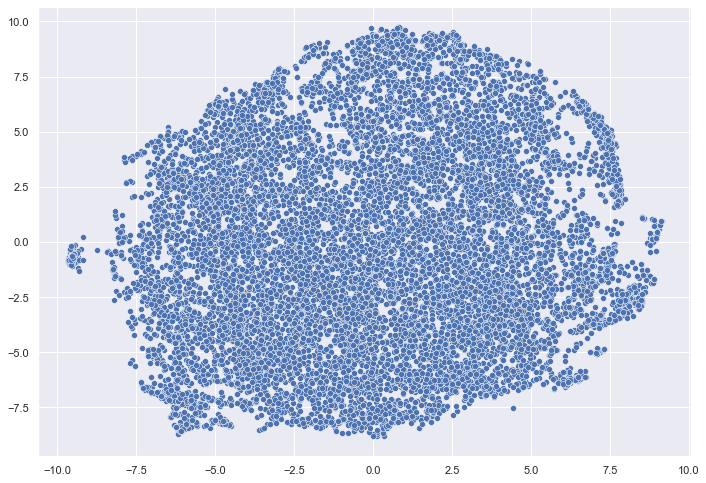

In [36]:
from sklearn.manifold import TSNE
perplexity = [50]
for p in perplexity:
    tsne = TSNE(
        n_components=2,
        init="random",
        random_state=0,
        perplexity=p,
        learning_rate="auto",
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.scatterplot(Y[:,0],Y[:,1])

## Trying video download

In [2]:
link = "https://www.youtube.com/watch?v=GLd3aX16zBg"
from pytube import YouTube

In [3]:
yt = YouTube(link)
yt

<pytube.__main__.YouTube object: videoId=GLd3aX16zBg>